In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [50]:
df= pd.read_csv('winequality-red.csv')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
df.info()

# no null values, 1599 values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
df.describe()

# very high acidity overall for each wine ph<7
# quality ranges from 3-8


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
df.corr()

# alcohol is the most positively correlated to quality
# volatile acidity is the most negatively correlated quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


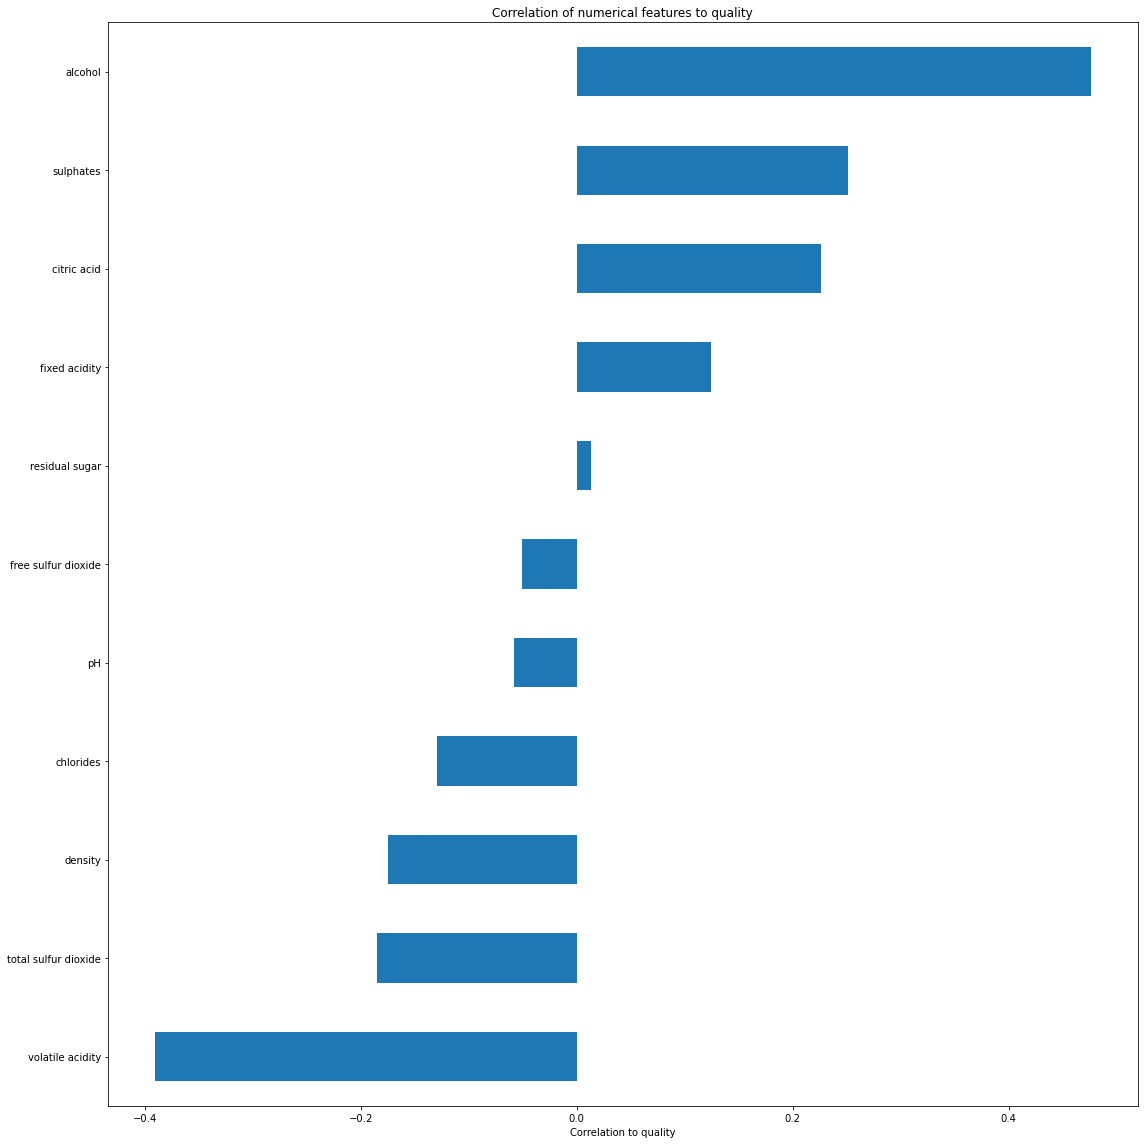

In [59]:
corr=df.corr()

plt.figure(figsize=(16,16));
corr["quality"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of numerical features to quality")
plt.xlabel("Correlation to quality")
plt.tight_layout()
plt.show()

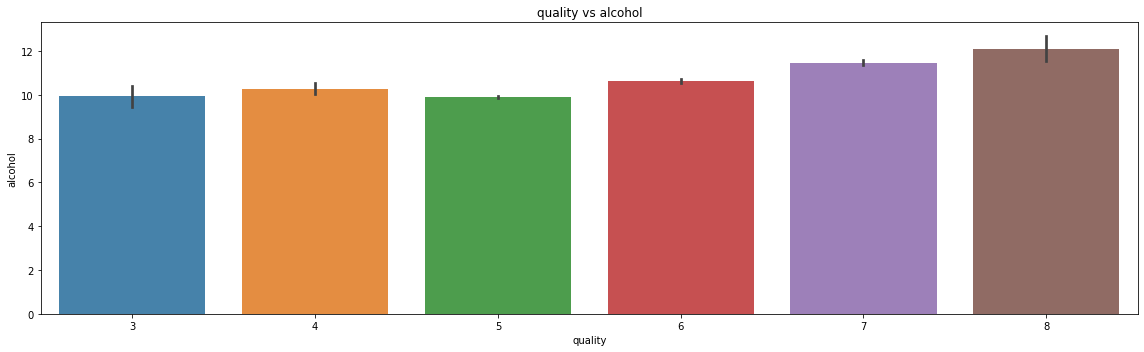

In [64]:
plt.figure(figsize=(16,5));
sns.barplot(x="quality", y="alcohol", data=df, linewidth=0.2, alpha=0.9)
plt.title(f"quality vs alcohol")
plt.tight_layout()
plt.show()

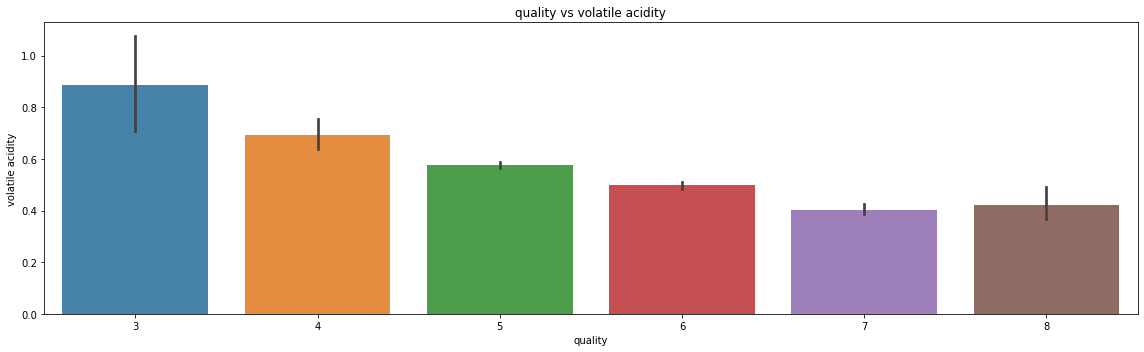

In [65]:
plt.figure(figsize=(16,5));
sns.barplot(x="quality", y="volatile acidity", data=df, linewidth=0.2, alpha=0.9)
plt.title(f"quality vs volatile acidity")
plt.tight_layout()
plt.show()

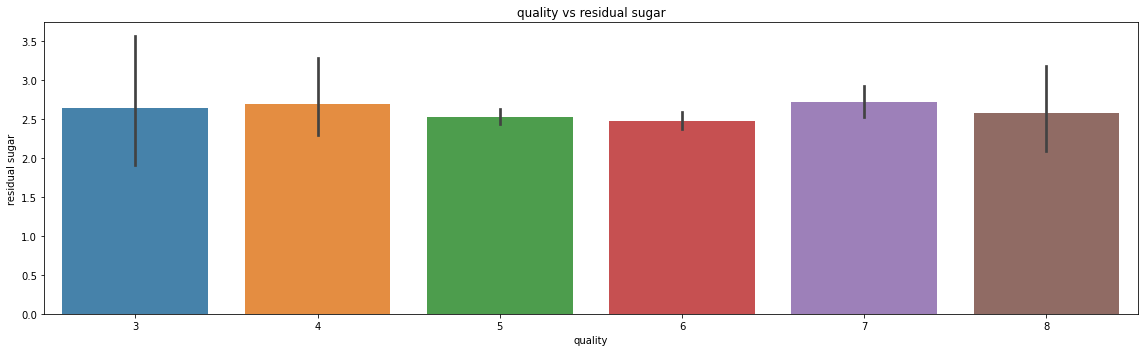

In [66]:
plt.figure(figsize=(16,5));
sns.barplot(x="quality", y="residual sugar", data=df, linewidth=0.2, alpha=0.9)
plt.title(f"quality vs residual sugar")
plt.tight_layout()
plt.show()

In [7]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [8]:
df.quality.value_counts()

# majority of wines range from quality rating of 5 and 6

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

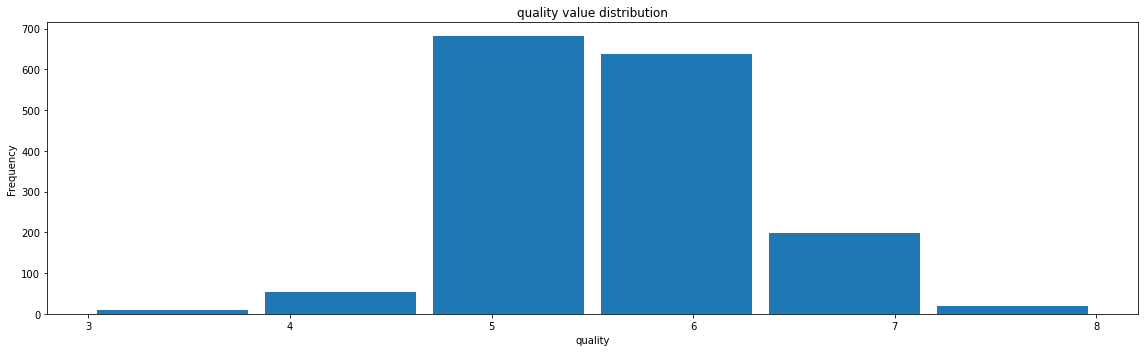

In [55]:
plt.figure(figsize=(16,5))
df.quality.plot(kind="hist", bins=6, rwidth=0.9)
plt.title("quality value distribution")
plt.xlabel("quality")
plt.tight_layout()
plt.show()


The skewness of quality is: 0.22


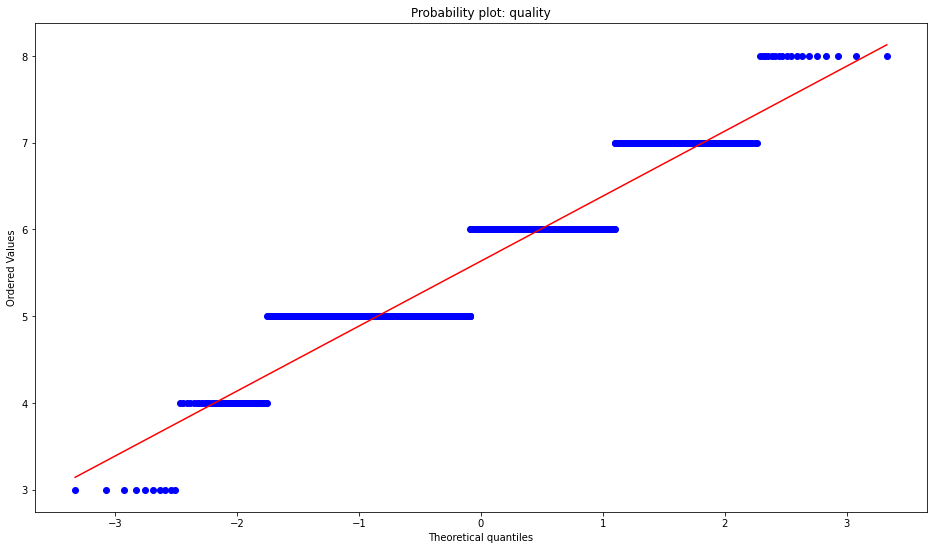

In [58]:
print(f"The skewness of quality is: {df.quality.skew():.2f}")

plt.figure(figsize=(16,9))
_ = stats.probplot(df['quality'], plot=plt)
plt.title("Probability plot: quality")
plt.show()

In [22]:
hidf=df[df['quality']>5]
lodf=df[df['quality']<=5]

print('lodf: \n',lodf.count())
print('hidf: \n',hidf.count())

#split data into low quality and hi quality
# 744/855

lodf: 
 fixed acidity           744
volatile acidity        744
citric acid             744
residual sugar          744
chlorides               744
free sulfur dioxide     744
total sulfur dioxide    744
density                 744
pH                      744
sulphates               744
alcohol                 744
quality                 744
dtype: int64
hidf: 
 fixed acidity           855
volatile acidity        855
citric acid             855
residual sugar          855
chlorides               855
free sulfur dioxide     855
total sulfur dioxide    855
density                 855
pH                      855
sulphates               855
alcohol                 855
quality                 855
dtype: int64


In [76]:
sum_ = df.groupby('quality').sum()
sum_

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,83.6,8.845,1.71,26.35,1.225,110.0,249.0,9.97464,33.98,5.70,99.550000
4,412.3,36.780,9.23,142.80,4.806,650.0,1921.0,52.81675,179.22,31.61,544.050000
5,5561.9,392.965,165.95,1722.15,63.153,11566.0,38486.0,679.02757,2250.67,422.88,6741.700000
6,5325.5,317.395,174.70,1580.45,54.202,10024.0,26075.0,635.84041,2116.93,430.86,6781.633333
7,1765.6,80.380,74.66,541.40,15.241,2795.0,6969.0,198.22475,654.86,147.51,2281.716667
8,154.2,7.620,7.04,46.40,1.232,239.0,602.0,17.91382,58.81,13.82,217.700000
